In [3]:
import pandas as pd
import numpy as np
import pycmap
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import os
import glob
import plotly.express as px

## Finding PAR data from hyperpro profiles from 15m and above

In [9]:
df = pd.read_csv('Gradients 4 - TN397 - Hyperpro Profiles.csv', usecols = ['kpar', 'flu', 'light_level', 'par_z', 'sal', 'dens', 'temp', 'time', 'lat', 'lon', 'depth'])
df['time'] = pd.DatetimeIndex(df.time.values)
df.dropna()
target_depth = df[df.depth < 15]
df1 = target_depth.groupby([pd.Grouper(key = 'time', freq = 'H')]).agg({'par_z': 'mean'}).reset_index()
df1[df1['par_z'].notnull()]

,time,par_z
0,2021-11-24 21:00:00+00:00,602.774615
96,2021-11-28 21:00:00+00:00,266.323333
168,2021-12-01 21:00:00+00:00,210.386667
240,2021-12-04 21:00:00+00:00,532.119286
288,2021-12-06 21:00:00+00:00,325.485000


In [8]:
df2 = pd.read_csv('Gradients5_TN412_Hyperpro_Profiles.csv', usecols = ['kpar', 'flu', 'light_level', 'par_z', 'sal', 'dens', 'temp', 'time', 'lat', 'lon', 'depth'])
df2['time'] = pd.DatetimeIndex(df2.time.values)
df2.dropna()
target_depth_2 = df2[df2.depth < 15]
df3 = target_depth_2.groupby([pd.Grouper(key = 'time', freq = 'H')]).agg({'par_z': 'mean'}).reset_index()
df3[df3['par_z'].notnull()]

,time,par_z
0,2023-01-28 22:00:00+00:00,618.440000
95,2023-02-01 21:00:00+00:00,783.908750
119,2023-02-02 21:00:00+00:00,760.216190
215,2023-02-06 21:00:00+00:00,713.361429
287,2023-02-09 21:00:00+00:00,825.661429


## Calling in sat par to compare against hyperpro profiles

In [4]:
sat_par = pd.read_csv('/Users/ceg/Desktop/kristine/SACNAS-2023-project/sat_par.csv')
sat_par['Date'] = pd.DatetimeIndex(sat_par.Date.values)

## Plots pt 1

In [5]:
merged = pd.merge(df1, sat_par, left_on = 'time', right_on = 'Date', how = 'inner')
merged

,time,par_z,Unnamed: 0,Date,cruise,PAR,sat_par
0,2021-11-24 21:00:00+00:00,602.774615,123,2021-11-24 21:00:00+00:00,TN397_130,959.642028,959.642028
1,2021-11-24 22:00:00+00:00,NaN,124,2021-11-24 22:00:00+00:00,TN397_130,822.392073,822.392073
2,2021-11-24 23:00:00+00:00,NaN,125,2021-11-24 23:00:00+00:00,TN397_130,922.855468,922.855468
3,2021-11-25 00:00:00+00:00,NaN,126,2021-11-25 00:00:00+00:00,TN397_130,393.171918,393.171918
4,2021-11-25 01:00:00+00:00,NaN,127,2021-11-25 01:00:00+00:00,TN397_130,125.243908,125.243908
...,...,...,...,...,...,...,...
283,2021-12-06 17:00:00+00:00,NaN,406,2021-12-06 17:00:00+00:00,TN397_130,1249.362394,1249.362394
284,2021-12-06 18:00:00+00:00,NaN,407,2021-12-06 18:00:00+00:00,TN397_130,961.905059,961.905059
285,2021-12-06 19:00:00+00:00,NaN,408,2021-12-06 19:00:00+00:00,TN397_130,1399.462119,1399.462119
286,2021-12-06 20:00:00+00:00,NaN,409,2021-12-06 20:00:00+00:00,TN397_130,1354.217580,1354.217580


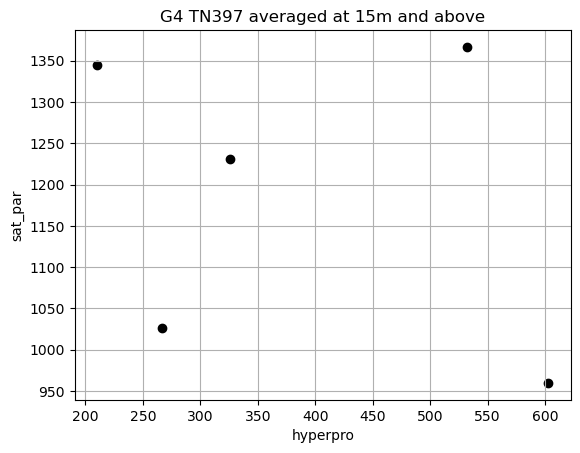

In [6]:
x = merged['par_z']
y = merged['sat_par']


plt.scatter(x, y, c = 'black')
#plt.scatter(x2, y2, c = 'red', label = 'sat PAR')


plt.xlabel("hyperpro")
plt.ylabel("sat_par")
plt.title("G4 TN397 averaged at 15m and above")
#plt.legend()
plt.grid()

## Plots pt 2

In [7]:
underway = pd.read_csv('Gradients 4 - TN397 - Underway Hyperpro - Surface PAR.csv')
underway['time'] = pd.DatetimeIndex(underway.time.values)
underway.dropna()
underway_hrly = underway.groupby([pd.Grouper(key = 'time', freq = 'H')]).agg({'surface_par': 'mean'}).reset_index()
underway_hrly = underway_hrly.loc[underway_hrly['surface_par'] < 3000]
underway_hrly[underway_hrly['time'] == '2021-11-25']
underway_hrly

,time,surface_par
128,2021-11-25 00:00:00+00:00,291.584121


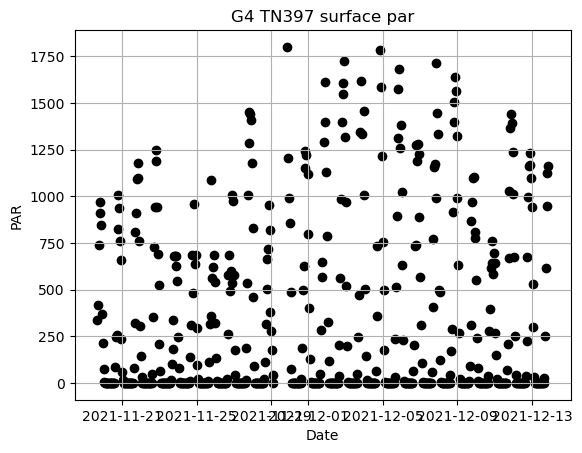

In [15]:
x = underway_hrly['time']
y = underway_hrly['surface_par']


plt.scatter(x, y, c = 'black')
#plt.scatter(x2, y2, c = 'red', label = 'sat PAR')


plt.xlabel("Date")
plt.ylabel("PAR")
plt.title('G4 TN397 surface par')
plt.grid()

In [22]:
licor_par = pd.read_csv('/Users/ceg/Desktop/kristine/SACNAS-2023-project/licor_hourly_par.csv')
licor_par['datetime'] = pd.DatetimeIndex(licor_par.datetime.values)
licor_par

,Unnamed: 0,datetime,mean_PAR
0,0,2021-11-19 16:00:00+00:00,401.968333
1,1,2021-11-19 17:00:00+00:00,486.087167
2,2,2021-11-19 18:00:00+00:00,891.885167
3,3,2021-11-19 19:00:00+00:00,1092.274333
4,4,2021-11-19 20:00:00+00:00,1002.763667
...,...,...,...
577,577,2021-12-13 17:00:00+00:00,234.544417
578,578,2021-12-13 18:00:00+00:00,688.223000
579,579,2021-12-13 19:00:00+00:00,1092.185333
580,580,2021-12-13 20:00:00+00:00,1320.478000


In [21]:
par_plot = pd.merge(licor_par, underway_hrly, left_on = 'datetime', right_on = 'time', how = 'inner')
par_plot

,Unnamed: 0,datetime,mean_PAR,time,surface_par
0,0,2021-11-19 16:00:00+00:00,401.968333,2021-11-19 16:00:00+00:00,335.690638
1,1,2021-11-19 17:00:00+00:00,486.087167,2021-11-19 17:00:00+00:00,417.335653
2,2,2021-11-19 18:00:00+00:00,891.885167,2021-11-19 18:00:00+00:00,740.360083
3,3,2021-11-19 19:00:00+00:00,1092.274333,2021-11-19 19:00:00+00:00,968.784938
4,4,2021-11-19 20:00:00+00:00,1002.763667,2021-11-19 20:00:00+00:00,911.214295
...,...,...,...,...,...
552,577,2021-12-13 17:00:00+00:00,234.544417,2021-12-13 17:00:00+00:00,251.926089
553,578,2021-12-13 18:00:00+00:00,688.223000,2021-12-13 18:00:00+00:00,613.033112
554,579,2021-12-13 19:00:00+00:00,1092.185333,2021-12-13 19:00:00+00:00,945.966395
555,580,2021-12-13 20:00:00+00:00,1320.478000,2021-12-13 20:00:00+00:00,1124.255474


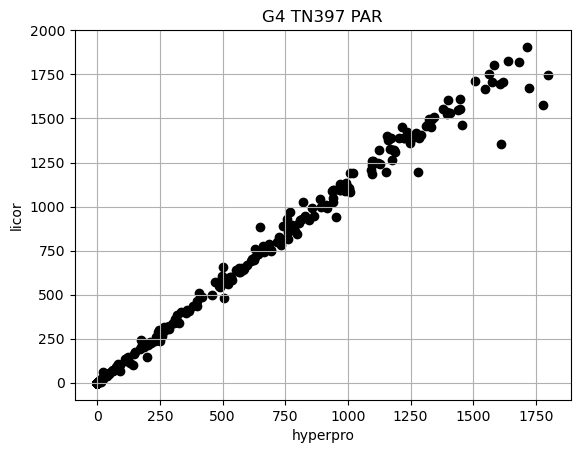

In [23]:
x = par_plot['surface_par']
y = par_plot['mean_PAR']

plt.scatter(x, y, c = 'black')

plt.xlabel("hyperpro")
plt.ylabel("licor")
plt.title('G4 TN397 PAR')
plt.grid()